In [191]:
import numpy as np
import matplotlib.pyplot as plt
import copy

import evo
from evo.tools import plot
from evo.core import metrics
from evo.core.units import Unit
from evo.core import sync

import g2o_and_time_to_pose_data as gt2pd

In [192]:
dataset = "outdoor"
robots = ['acl_jackal', 'acl_jackal2', 'sparkal1', 'sparkal2', 'hathor', 'thoth', 'apis', 'sobek'] \
    if dataset == "hybrid" or dataset == "tunnels" else \
    ['acl_jackal', 'acl_jackal2', 'sparkal1', 'sparkal2', 'hathor', 'thoth']
kmd_gt_csv = f"/home/masonbp/data/kimera_multi/{dataset}/gt"

# outdoor

# time_file = "/home/masonbp/results/segment_track/kmd_outdoor/05_clip_6Hz/g2o/time_2m.txt"
# g2o_file = "/home/masonbp/results/offline_rpgo/kmd_outdoor/05_clip_6Hz/00_semanticvolgrav/result_sparse_5.g2o"

# time_file = "/home/masonbp/results/segment_track/kmd_tunnels/05_clip_6Hz/g2o/time_2m.txt"
# g2o_file = "/home/masonbp/results/offline_rpgo/kmd_tunnels/05_clip_6Hz/00_semanticvolgrav/result_sparse_6.g2o"

# time_file = f"/home/masonbp/results/segment_track/kmd_{dataset}/05_clip_6Hz/g2o/time_2m.txt"
# g2o_file = f"/home/masonbp/results/offline_rpgo/kmd_{dataset}/05_clip_6Hz/00_semanticvolgrav/odom_0.15_lc_2.0/result_sparse_6.g2o"

############## Hybrid

# time_file = "/home/masonbp/results/offline_rpgo/kmd_hybrid/visual_lc/time.txt"
# g2o_file = "/home/masonbp/results/offline_rpgo/kmd_hybrid/visual_lc/result.g2o"

# time_file = "/home/masonbp/results/segment_track/kmd_hybrid/00/g2o/time_2m.txt"
# g2o_file = "/home/masonbp/results/offline_rpgo/kmd_hybrid/00/00_evg/odom_0.2_lc_2.5/result_sparse_7.g2o"

# time_file = "/home/masonbp/results/segment_track/kmd_hybrid/00/g2o/time_2m.txt"
# g2o_file = "/home/masonbp/results/offline_rpgo/kmd_hybrid/visual_object_lc/00/result_sparse_7.g2o"

############## General

time_file = f"/home/masonbp/results/segment_track/kmd_{dataset}/09_6Hz_voxel0.2/g2o/time_2m.txt"
g2o_file = f"/home/masonbp/results/offline_rpgo/kmd_{dataset}/09_6Hz_voxel0.2/spvg_min_cos_0.85/odom_0.2x5_lc_1.0x5/result_sparse_5.g2o"
# time_file = f"/home/masonbp/results/segment_track/kmd_{dataset}/05_clip_6Hz/g2o/time_2m.txt"
# g2o_file = f"/home/masonbp/results/offline_rpgo/kmd_{dataset}/05_clip_6Hz/00_semanticvolgrav/odom_0.2_lc_2.0/result_sparse_5.g2o"

############## Coarse Visual

# time_file = f"/home/masonbp/results/offline_rpgo/kmd_{dataset}/visual_coarse/time.txt"
# 
# g2o_file = f"/home/masonbp/results/offline_rpgo/kmd_{dataset}/visual_coarse/odom_0.1_lc_0.4/result.g2o"
# g2o_file = f"/home/masonbp/results/offline_rpgo/kmd_{dataset}/visual_coarse_object/05_clip_6Hz/odom_0.1/result_6.g2o"

pd_est, pd_gt = gt2pd.gt_csv_est_g2o_to_pose_data(g2o_file, time_file, {i: f"{kmd_gt_csv}/{robots[i]}.csv" for i in range(len(robots))})

In [193]:
# print(pd_est.t0 - pd_gt.t0)
# print(pd_est.tf - pd_gt.tf)

# pd_est.plot2d(t=pd_est.times[::30])
# plt.show()

# pd_gt.plot2d(t=pd_gt.times[::10])
# plt.show()

In [194]:
traj_ref = pd_gt.to_evo()
traj_est = pd_est.to_evo()

max_diff = 0.01

traj_ref, traj_est = sync.associate_trajectories(traj_ref, traj_est, max_diff)

traj_est_aligned = copy.deepcopy(traj_est)
traj_est_aligned.align(traj_ref, correct_scale=False, correct_only_scale=False)

(array([[-0.50059219,  0.66857798, -0.54991903],
        [-0.64738892, -0.71085085, -0.27491573],
        [-0.57471301,  0.21839083,  0.78867636]]),
 array([297.05324274, -67.19809154,  14.81711238]),
 1.0)

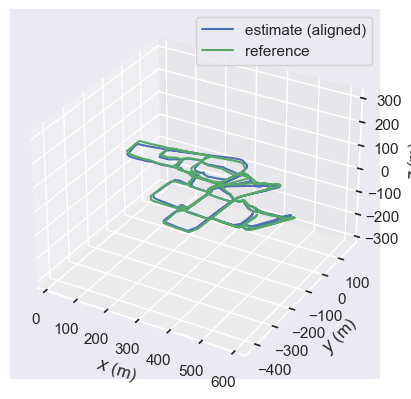

In [195]:
fig = plt.figure()
traj_by_label = {
    # "estimate (not aligned)": traj_est,
    "estimate (aligned)": traj_est_aligned,
    "reference": traj_ref
}
plot.trajectories(fig, traj_by_label, plot.PlotMode.xyz)
plt.show()

In [196]:
pose_relation = metrics.PoseRelation.translation_part
use_aligned_trajectories = True

In [197]:
if use_aligned_trajectories:
    data = (traj_ref, traj_est_aligned) 
else:
    data = (traj_ref, traj_est)

In [198]:
ape_metric = metrics.APE(pose_relation)
ape_metric.process_data(data)

In [199]:
ape_stat = ape_metric.get_statistic(metrics.StatisticsType.rmse)
print(ape_stat)

10.427716559720471


In [200]:
ape_stats = ape_metric.get_all_statistics()
for stat_key, stat_value in ape_stats.items():
    print(f"{stat_key}:\n{stat_value}")

rmse:
10.427716559720471
mean:
8.817523939634242
median:
7.4069862504518085
std:
5.566735508702164
min:
0.7805883091424975
max:
36.21164799399405
sse:
57630.75450443032
